In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [23]:
class ModifiedPenneysGame:
    '''
    Run N iterations of the Modified Penneys Game
    Each run tests all combinations for 2 players with M bits
    '''
    DECK = ['0']*26 + ['1']*26

    def __init__(self,
                 num_games = 10,
                 num_bits = 3,
                 random_seed = 1):
        
        if random_seed:
            random.seed(random_seed)
        self.num_bits = num_bits
        self.num_games = num_games
        self.make_deck()
        self.make_choice_list()

        # Temp For Testing
        a = self.play_mult_game(100,'000','111')
        print(a)
        return
    
    def make_deck(self):
        self.deck = self.DECK.copy()
        random.shuffle(self.deck)
        self.deck = ''.join(self.deck)
        return
    
    def make_choice_list(self):
        '''
        Make a list of all binary numbers up to 2^num_bits
        '''
        self.choices = [bin(n).split('b')[-1].zfill(self.num_bits)
                        for n in range(2**self.num_bits)]
        return
    
    def play_one_game(self, p1, p2):
        '''
        Return 0 for p1, 1 for p2, -1 for a tie
        '''
        points1 = 0
        points2 = 0

        idx1 = self.deck.find(p1)
        idx2 = self.deck.find(p2)

        while (idx1 != -1) or (idx2 != -1):

            if idx1 == -1:
                idx1 = np.inf
            if idx2 == -1:
                idx2 = np.inf
            
            if idx1 < idx2:
                points1 += idx1 + self.num_bits
                self.deck = self.deck[idx1 + self.num_bits:]
            else:
                points2 += idx2 + self.num_bits
                self.deck = self.deck[idx2 + self.num_bits:]
            
            idx1 = self.deck.find(p1)
            idx2 = self.deck.find(p2)
        
        if points1 > points2:
            return 0
        elif points1 < points2:
            return 1
        else:
            return 0.5
        
    def play_mult_game(self, num_games, p1, p2):
        results = np.zeros(num_games)
        for n in range(num_games):
            self.make_deck()
            r = self.play_one_game(p1, p2)
            results[n] = r

        return results

In [36]:
mpg = ModifiedPenneysGame()

[1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 1.]


In [50]:
results = mpg.play_mult_game(100000,'101','100')

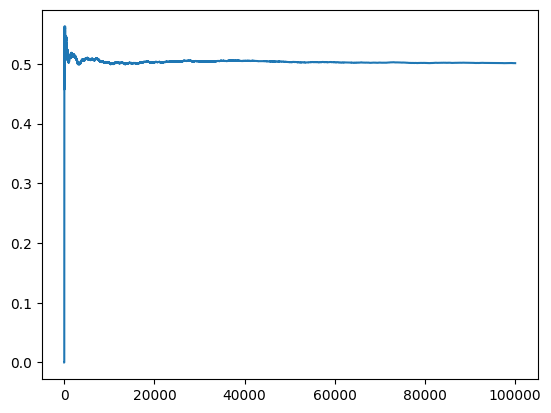

In [51]:
plt.plot([np.mean(results[:x]) for x in range(1,100000)])
plt.show()